# Preliminary Results


In [1]:
#Downloading the necessary packages.
library(tidyverse)
library(tidymodels)
library(repr)
library(GGally)
library(digest)
library(infer)
library(cowplot)
library(datateachr)
library(taxyvr)
library(broom)
library(testthat)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.1     ✔ rsample      1.1.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.3     ✔ workflows    1.0.0
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.1     ✔ yardstick    1.1.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() ma

In [4]:
#Setting the seed.
set.seed(1234)

#Dowloading the data from the web and reading it in R.
url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv"
download.file (url,"forestfires.csv" )

forest_fires_data <-read_delim("forestfires.csv", skip=0, delim=",")%>%
    mutate(month = as.factor(month)) %>% #Wrangling data and selecting columns to be used in prediction
    mutate(wind = as.numeric(wind))%>%
    mutate(area = as.numeric(area))%>%
    filter(!is.na(month)) %>%
    filter(!is.na(wind))%>%
    filter(!is.na(area))%>%
    select(month, wind, area)
    
head(forest_fires_data)

Rows: 517 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): month, day
dbl (11): X, Y, FFMC, DMC, DC, ISI, temp, RH, wind, rain, area

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


month,wind,area
<fct>,<dbl>,<dbl>
mar,6.7,0
oct,0.9,0
oct,1.3,0
mar,4.0,0
mar,1.8,0
aug,5.4,0


##### Table 1: Top 6 Rows of Forest Fires Data

In [5]:
#Visualizing the summary of the predictor variables.
print(summary(forest_fires_data))

     month          wind            area        
 aug    :184   Min.   :0.400   Min.   :   0.00  
 sep    :172   1st Qu.:2.700   1st Qu.:   0.00  
 mar    : 54   Median :4.000   Median :   0.52  
 jul    : 32   Mean   :4.018   Mean   :  12.85  
 feb    : 20   3rd Qu.:4.900   3rd Qu.:   6.57  
 jun    : 17   Max.   :9.400   Max.   :1090.84  
 (Other): 38                                    


##### Table 2: Summary Statistics of Forest Fires Data

Warning message:
“Ignoring unknown parameters: binwidth”


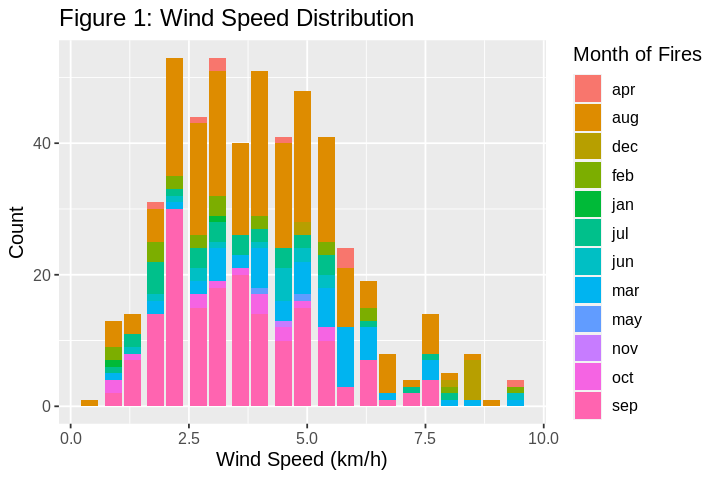

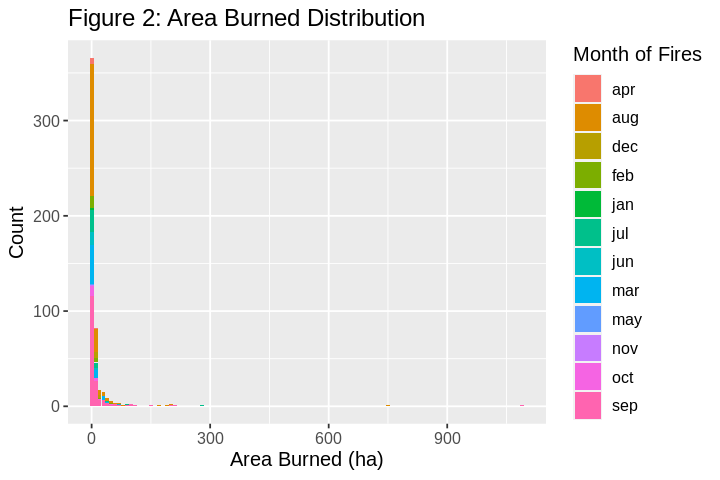

In [48]:
options(repr.plot.width = 6, repr.plot.height = 4)

#Visualizing the distribution of each variable
plot_1 <- forest_fires_data %>%
    ggplot(aes(x = wind, fill = month))+
    geom_bar(binwidth = 10) + 
    labs(x="Wind Speed (km/h)", y="Count")+
    ggtitle("Figure 1: Wind Speed Distribution") +
    scale_fill_discrete(name = "Month of Fires")+
    theme(text = element_text(size = 12)) 
plot_1

plot_2 <- forest_fires_data %>%
    ggplot(aes(x =area, fill = month))+
    geom_histogram(binwidth = 10) + 
    labs(x="Area Burned (ha)", y="Count")+
    ggtitle("Figure 2: Area Burned Distribution") +
    scale_fill_discrete(name = "Month of Fires")+
    theme(text = element_text(size = 12))
plot_2

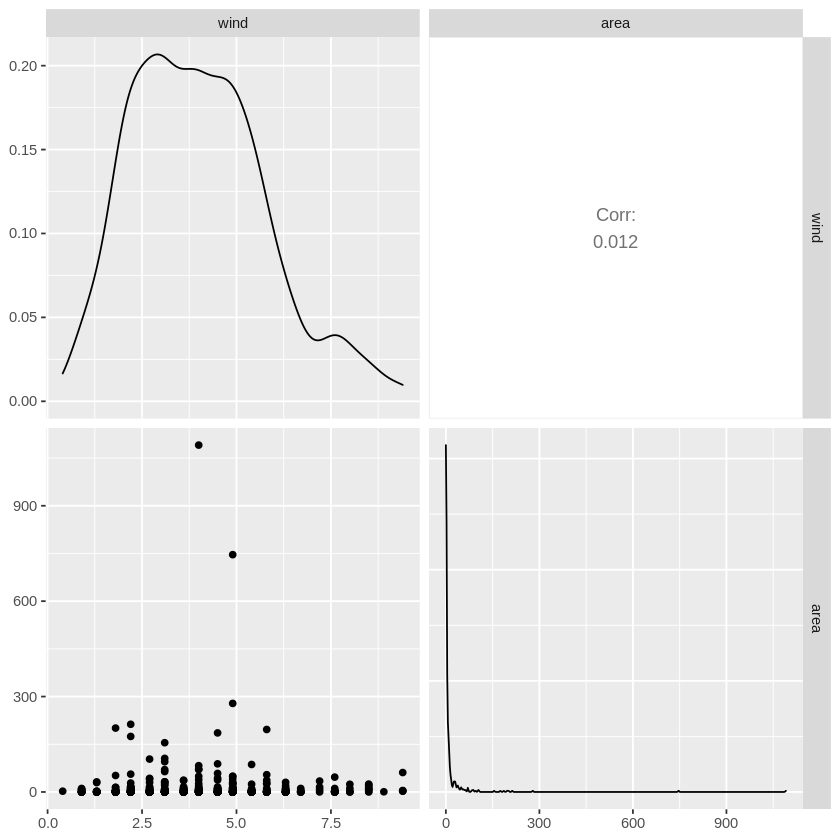

In [24]:
ggpairs(forest_fires_data%>% select(wind, area))

The area column of the forest fires data is transformed using the log function so that the we have unimodal distribution for the area burned distribution compared to the heavily skewed one we had before.

In [20]:
forest_fires_data <- forest_fires_data %>%
    mutate(area_log10 = log10(1+ area))

In [21]:
lim <- quantile(forest_fires_data$wind, 0.5)
lim

50% 
  4

In [26]:
data <- forest_fires_data %>% mutate(wind_speed = ifelse(forest_fires_data$wind <= lim, 'low', 'high'))
head(data)

month,wind,area,area_log10,wind_speed
<fct>,<dbl>,<dbl>,<dbl>,<chr>
mar,6.7,0,0,high
oct,0.9,0,0,low
oct,1.3,0,0,low
mar,4.0,0,0,low
mar,1.8,0,0,low
aug,5.4,0,0,high


# Methods: Plan

This report can be considered trustworthy based on:
- The data coming from a peer reviewed research that is publicly available.
- All the N/A values are removed from the dataset and the response variable is transformed using a log function to have a unimodal distribution.

The above plots do not pro...